# Characterizing a Quantum Battery in Quantum Inspire

Date of data achieved: 02/12/2023

Milou van Nederveen

Starmon-5 by Quantum Inspire

In [40]:
from quantuminspire.credentials import save_account

#use your own API from quantum inspire
save_account('API')

In [3]:
import numpy as np
import os

from qiskit import execute, QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.tools.visualization import circuit_drawer, plot_histogram
from IPython.display import display, Math, Latex
import matplotlib.pyplot as plt
font = {'family':'serif'}

from quantuminspire.credentials import get_authentication
from quantuminspire.api import QuantumInspireAPI
from quantuminspire.qiskit import QI

QI_URL = os.getenv('API_URL', 'https://api.quantum-inspire.com/')
authentication = get_authentication()
QI.set_authentication(authentication, QI_URL)
backend = QI.get_backend('Starmon-5')

In [4]:
def finding_value(counts,qubit):
    total = 0
    if qubit == 0:
        for binary_string, number in counts.items():
            if binary_string[4] == '1':
                total += number
    if qubit == 1:
        for binary_string, number in counts.items():
             if binary_string[3] == '1':
                total += number
    if qubit == 2:
        for binary_string, number in counts.items():
             if binary_string[2] == '1':
                total += number
    if qubit == 3:
        for binary_string, number in counts.items():
             if binary_string[1] == '1':
                total += number
    if qubit == 4:
        for binary_string, number in counts.items():
             if binary_string[0] == '1':
                total += number
    return total/1024

In [5]:
theta = np.linspace(0, np.pi, 16)
num_datapoints = 20
shots = 1024
y_values = []
qubit=0
data_q0=[]

for t in theta:
    qr = QuantumRegister(5)
    cr = ClassicalRegister(5)
    qc = QuantumCircuit(qr,cr)
    
    qc.rx(t,qubit)
    qc.measure(qr[qubit],cr[qubit])
    
    job = backend.run(qc,shots)
    counts = job.result().get_counts()
    
    y = finding_value(counts,qubit,shots)
    y_values.append(y)

data_q0.append(y_values)

In [6]:
data_q0=[[0.0625, 0.068359375, 0.1083984375, 0.1689453125, 0.197265625, 0.279296875, 0.3681640625, 0.4912109375, 0.5634765625, 0.65234375, 0.7529296875, 0.8564453125, 0.8798828125, 0.927734375, 0.9755859375, 0.982421875], [0.0546875, 0.0576171875, 0.109375, 0.1826171875, 0.2060546875, 0.2509765625, 0.37890625, 0.4443359375, 0.6005859375, 0.6630859375, 0.7578125, 0.8515625, 0.8955078125, 0.94921875, 0.966796875, 0.97265625], [0.06640625, 0.0615234375, 0.115234375, 0.1728515625, 0.2216796875, 0.2607421875, 0.369140625, 0.4716796875, 0.5703125, 0.671875, 0.7490234375, 0.83203125, 0.86328125, 0.927734375, 0.95703125, 0.974609375], [0.0556640625, 0.076171875, 0.1123046875, 0.1376953125, 0.2021484375, 0.26953125, 0.375, 0.4443359375, 0.57421875, 0.6630859375, 0.7509765625, 0.8603515625, 0.85546875, 0.9306640625, 0.9619140625, 0.9765625], [0.0546875, 0.0732421875, 0.1298828125, 0.1611328125, 0.208984375, 0.26171875, 0.3798828125, 0.4853515625, 0.5908203125, 0.6533203125, 0.7626953125, 0.8349609375, 0.8818359375, 0.9296875, 0.9560546875, 0.9736328125], [0.052734375, 0.05859375, 0.1181640625, 0.140625, 0.21484375, 0.28515625, 0.3359375, 0.4677734375, 0.59765625, 0.677734375, 0.75390625, 0.8330078125, 0.861328125, 0.9326171875, 0.95703125, 0.97265625], [0.0615234375, 0.0673828125, 0.12109375, 0.1728515625, 0.2177734375, 0.27734375, 0.373046875, 0.470703125, 0.5419921875, 0.6884765625, 0.767578125, 0.8310546875, 0.8681640625, 0.9345703125, 0.970703125, 0.9658203125], [0.0634765625, 0.06640625, 0.12109375, 0.1640625, 0.1962890625, 0.27734375, 0.353515625, 0.4423828125, 0.5732421875, 0.6611328125, 0.7822265625, 0.8603515625, 0.88671875, 0.9443359375, 0.9716796875, 0.97265625], [0.0615234375, 0.064453125, 0.10546875, 0.18359375, 0.1904296875, 0.2646484375, 0.3779296875, 0.4453125, 0.5517578125, 0.6728515625, 0.7666015625, 0.833984375, 0.8837890625, 0.923828125, 0.9541015625, 0.982421875], [0.05859375, 0.076171875, 0.119140625, 0.15625, 0.19921875, 0.279296875, 0.3544921875, 0.4453125, 0.5849609375, 0.6796875, 0.7587890625, 0.8310546875, 0.8857421875, 0.9267578125, 0.9560546875, 0.96875]]

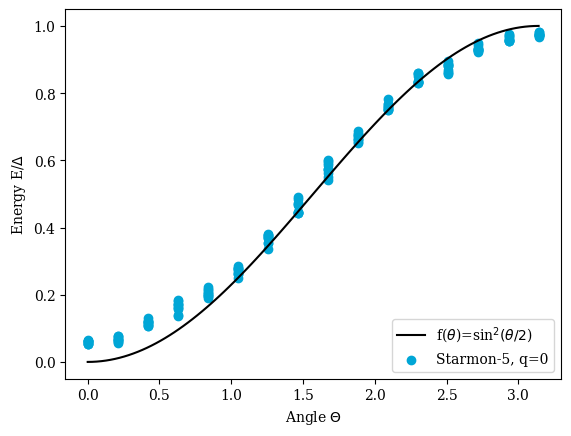

In [19]:
# Generate the function values
x_func = np.linspace(min(theta), max(theta), 100)
y_func = np.sin(x_func/2)**2

tud_color='#00A6D6'

plt.plot(x_func, y_func, color='black')

for i in range(len(data_q0)):
    plt.scatter(theta,data_q0[i],color=tud_color)

plt.xticks(fontname='serif')
plt.yticks(fontname='serif')

plt.xlabel("Angle $\\Theta$",**font)
plt.ylabel("Energy E/$\\Delta$",**font)

plt.legend(["f($\\theta$)=sin$^2(\\theta/2$)", "Starmon-5, q=0"], prop=font, loc="lower right")
plt.show()

In [20]:
data1 =np.array(data_q0)
data= data1.transpose()

In [21]:
print(data)

[[0.0625     0.0546875  0.06640625 0.05566406 0.0546875  0.05273438
  0.06152344 0.06347656 0.06152344 0.05859375]
 [0.06835938 0.05761719 0.06152344 0.07617188 0.07324219 0.05859375
  0.06738281 0.06640625 0.06445312 0.07617188]
 [0.10839844 0.109375   0.11523438 0.11230469 0.12988281 0.11816406
  0.12109375 0.12109375 0.10546875 0.11914062]
 [0.16894531 0.18261719 0.17285156 0.13769531 0.16113281 0.140625
  0.17285156 0.1640625  0.18359375 0.15625   ]
 [0.19726562 0.20605469 0.22167969 0.20214844 0.20898438 0.21484375
  0.21777344 0.19628906 0.19042969 0.19921875]
 [0.27929688 0.25097656 0.26074219 0.26953125 0.26171875 0.28515625
  0.27734375 0.27734375 0.26464844 0.27929688]
 [0.36816406 0.37890625 0.36914062 0.375      0.37988281 0.3359375
  0.37304688 0.35351562 0.37792969 0.35449219]
 [0.49121094 0.44433594 0.47167969 0.44433594 0.48535156 0.46777344
  0.47070312 0.44238281 0.4453125  0.4453125 ]
 [0.56347656 0.60058594 0.5703125  0.57421875 0.59082031 0.59765625
  0.54199219 0.

In [22]:
mean_values = []
for t in range(len(theta)):
    mean_values.append(np.mean(data[t])) 

In [23]:
print(mean_values)

[0.0591796875, 0.0669921875, 0.116015625, 0.1640625, 0.20546875, 0.27060546875, 0.3666015625, 0.46083984375, 0.57490234375, 0.668359375, 0.76025390625, 0.84248046875, 0.876171875, 0.93271484375, 0.9626953125, 0.97421875]


In [24]:
std_dev=[]
for t in range(len(theta)):
    std_dev.append(np.std(data[t])) 

In [25]:
std_dev

[0.004327835899640691,
 0.006361913076133724,
 0.006971315741240135,
 0.01489377876820029,
 0.009708819157528569,
 0.010255766200359936,
 0.013547143073327998,
 0.017758675617634972,
 0.018181118084693533,
 0.01115335276192909,
 0.00947064250502614,
 0.012267817404578139,
 0.012489314280272007,
 0.0076702130726011486,
 0.007447529673803756,
 0.0049833401649113564]

In [26]:
#from scipy.stats import sem
#std_err=[]

#for t in range(len(theta)):
#    std_err.append(sem(data[t]))
                   
#print(std_err)

In [27]:
std_err=[]

for t in range(len(theta)):
    std_err.append(np.std(data[t], ddof=1) / np.sqrt(np.size(data[t])))

print(std_err)

[0.001442611966546897, 0.0021206376920445743, 0.0023237719137467116, 0.004964592922733429, 0.003236273052509523, 0.0034185887334533117, 0.004515714357775999, 0.005919558539211657, 0.006060372694897844, 0.0037177842539763634, 0.003156880835008713, 0.004089272468192713, 0.004163104760090668, 0.0025567376908670492, 0.0024825098912679183, 0.0016611133883037855]


In [28]:
min_values = []
for t in range(len(theta)):
    min_values.append(np.min(data[t])) 
    
max_values = []
for t in range(len(theta)):
    max_values.append(np.max(data[t])) 

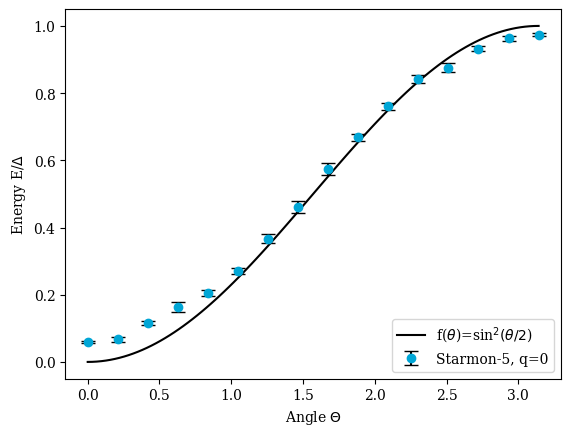

<Figure size 640x480 with 0 Axes>

In [29]:
# Generate the function values
x_func = np.linspace(min(theta), max(theta), 100)
y_func = np.sin(x_func/2)**2

tud_color='#00A6D6'

plt.plot(x_func, y_func, color='black')
#plt.scatter(theta, mean_values,color=tud_color)

#plot error bars with stdev here
plt.errorbar(theta, mean_values, yerr=std_dev, fmt='o', color=tud_color, ecolor='black', capsize=5)

plt.xticks(fontname='serif')
plt.yticks(fontname='serif')

plt.xlabel("Angle $\\Theta$",**font)
plt.ylabel("Energy E/$\\Delta$",**font)

plt.legend(["f($\\theta$)=sin$^2(\\theta/2$)", "Starmon-5, q=0"], prop=font, loc="lower right")
plt.show()
plt.savefig('starmon-5-q0-error-stdev.png')


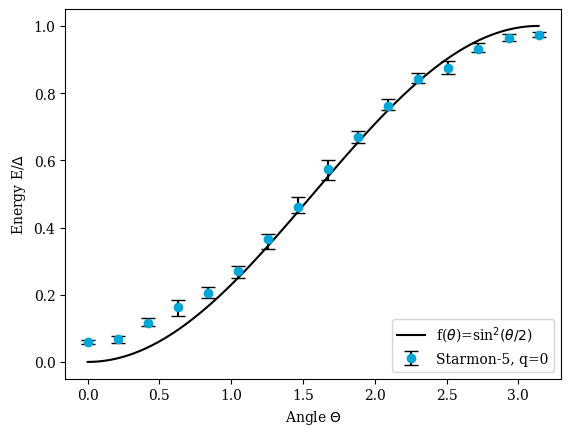

<Figure size 640x480 with 0 Axes>

In [30]:
# Generate the function values
x_func = np.linspace(min(theta), max(theta), 100)
y_func = np.sin(x_func/2)**2

tud_color='#00A6D6'

plt.plot(x_func, y_func, color='black')
#plt.scatter(theta, mean_values,color=tud_color)

#plot error bars with stdev here
plt.errorbar(theta, mean_values, yerr=[np.array(mean_values) - np.array(min_values), np.array(max_values) - np.array(mean_values)], fmt='o', color=tud_color, ecolor='black', capsize=5)

plt.xticks(fontname='serif')
plt.yticks(fontname='serif')

plt.xlabel("Angle $\\Theta$",**font)
plt.ylabel("Energy E/$\\Delta$",**font)

plt.legend(["f($\\theta$)=sin$^2(\\theta/2$)", "Starmon-5, q=0"], prop=font, loc="lower right")
plt.show()
plt.savefig('starmon-5-q0-error-minmax.png')

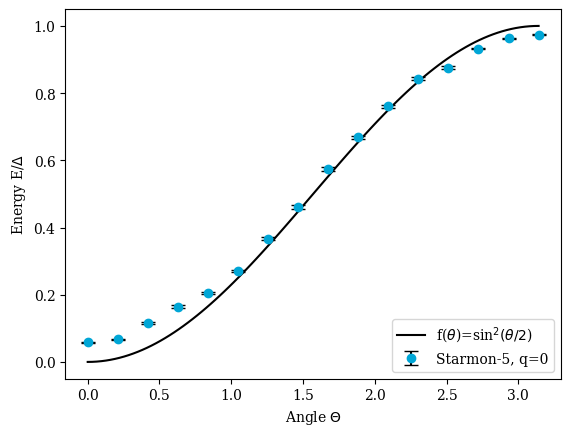

<Figure size 640x480 with 0 Axes>

In [31]:
# Generate the function values
x_func = np.linspace(min(theta), max(theta), 100)
y_func = np.sin(x_func/2)**2

tud_color='#00A6D6'

plt.plot(x_func, y_func, color='black')
#plt.scatter(theta, mean_values,color=tud_color)

#plot error bars with stdev here
plt.errorbar(theta, mean_values, yerr=std_err, fmt='o', color=tud_color, ecolor='black', capsize=5)

plt.xticks(fontname='serif')
plt.yticks(fontname='serif')

plt.xlabel("Angle $\\Theta$",**font)
plt.ylabel("Energy E/$\\Delta$",**font)

plt.legend(["f($\\theta$)=sin$^2(\\theta/2$)", "Starmon-5, q=0"], prop=font, loc="lower right")
plt.show()
plt.savefig('starmon-5-q0-error-stdev.png')

# Curve fitting

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [33]:
def sin2_func(x, a,b):
    y = a*np.sin(x/2)**2+2*np.sqrt(a)*np.sqrt(1-a)*np.sin(b)*np.sin(x/2)*np.cos(x/2)+(1-a)*np.cos(x/2)**2
    return y

In [34]:
guess = [0.9999, 0]

xdata=theta
ydata=mean_values

#parameters, covariance = curve_fit(sin2_func, xdata, ydata, p0=guess)
parameters, covariance = curve_fit(sin2_func, xdata, ydata, p0=guess)


fit_a = parameters[0]
fit_b = parameters[1]

In [35]:
print(fit_a)
print(fit_b)

0.9576010234699609
0.11992234340291748


In [36]:
fit_sin2 = sin2_func(xdata, fit_a, fit_b)

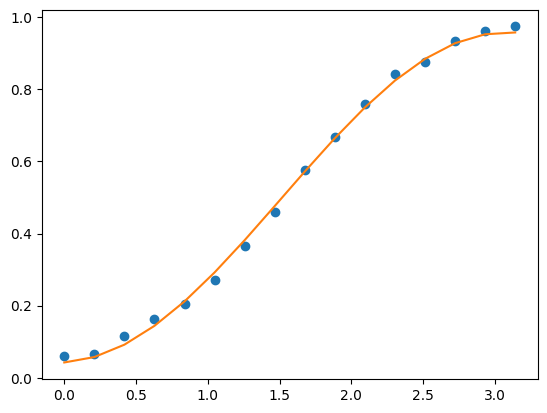

In [37]:
plt.plot(xdata, ydata, 'o', label='data')
plt.plot(xdata, fit_sin2 , '-', label='fit')

In [38]:
SE = np.sqrt(np.diag(covariance))
SE_a = SE[0]
SE_b = SE[1]

print(F'The value of a is {fit_a:.5f} with standard error of {SE_a:.5f}.')
print(F'The value of phi is {fit_b:.5f} with standard error of {SE_b:.5f}.')

The value of a is 0.95760 with standard error of 0.00524.
The value of phi is 0.11992 with standard error of 0.02877.


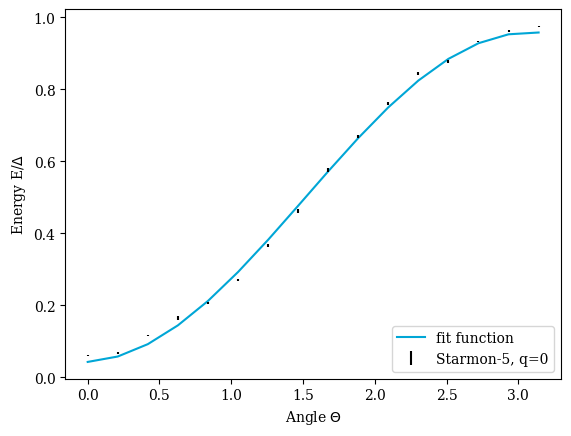

In [39]:
plt.plot(xdata, fit_sin2 , '-', label='fit',color=tud_color)
#plt.errorbar(theta, mean_values, yerr=std_err, fmt='.', ecolor='black',capsize=3)
plt.errorbar(theta, mean_values, yerr=std_err, fmt='none',ecolor='black')


plt.xticks(fontname='serif')
plt.yticks(fontname='serif')

plt.xlabel("Angle $\\Theta$",**font)
plt.ylabel("Energy E/$\\Delta$",**font)
plt.legend(["fit function", "Starmon-5, q=0"], prop=font, loc="lower right")

plt.savefig('starmon-5-q0-fit.png')